<a href="https://colab.research.google.com/github/SanjayBista1010/Classification/blob/main/LinearRegerssionAnalysisFromCostFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd

df = pd.read_csv('insurance_lr(1).csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
df = pd.get_dummies(df, columns=['sex','region'], drop_first=True, dtype=int)

In [24]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [25]:
df

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1,1,0,0
1334,18,31.920,0,0,2205.98080,0,0,0,0
1335,18,36.850,0,0,1629.83350,0,0,1,0
1336,21,25.800,0,0,2007.94500,0,0,0,1


In [26]:
y = df['charges']
X = df.drop('charges', axis=1)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
x = df['bmi'].values.tolist()
y = df['charges'].values.tolist()

w = 0
b = 0

N = len(x)
alpha = 0.00001
epoch = 10000

for i in range(epoch):
    y_pred = [w * x[j] + b for j in range(N)]
    error = [y[j] - y_pred[j] for j in range(N)]

    djw_ = [(-x[j] * (y[j] - y_pred[j])) / N for j in range(N)]
    djb_ = [(-(y[j] - y_pred[j])) / N for j in range(N)]

    djw = sum(djw_)
    djb = sum(djb_)

    w = w - alpha * djw
    b = b - alpha * djb

    if i % 1000 == 0:
        mse = sum([(e ** 2) for e in error]) / N
        print(f'Epoch {i} MSE= {mse}')

print(f'Trained parameters: w = {w}, b = {b}')

Epoch 0 MSE= 322646873.58870494
Epoch 1000 MSE= 140830746.2549303
Epoch 2000 MSE= 140830705.60215783
Epoch 3000 MSE= 140830665.50443357
Epoch 4000 MSE= 140830625.43715784
Epoch 5000 MSE= 140830585.4003067
Epoch 6000 MSE= 140830545.39385748
Epoch 7000 MSE= 140830505.41778728
Epoch 8000 MSE= 140830465.4720727
Epoch 9000 MSE= 140830425.5566907
Trained parameters: w = 430.73526640881414, b = 17.989224699356267


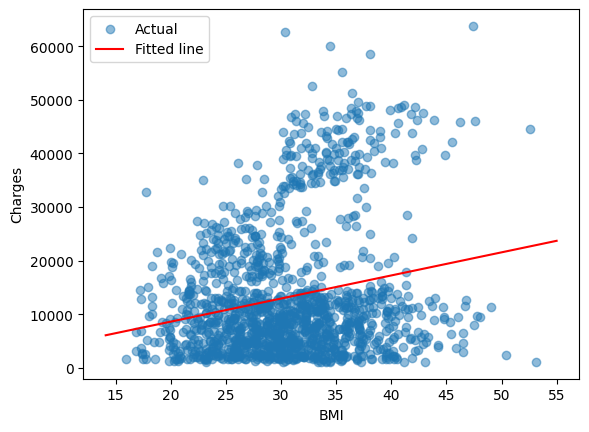

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['bmi'], df['charges'], alpha=0.5, label='Actual')
x_vals = np.array(plt.gca().get_xlim())
y_vals = w * x_vals + b
plt.plot(x_vals, y_vals, color='red', label='Fitted line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [30]:
X = df.drop('charges', axis=1).values.tolist()
y = df['charges'].tolist()

N = len(y)
alpha = 0.0000001
epoch = 10000

w = [0] * len(X[0])
b = 0

for i in range(epoch):

  y_pred = [sum(w[k] * X[j][k] for k in range(len(w)) )+ b for j in range(N)]
  error = [y[j] - y_pred[j] for j in range(N)]

  djw = [-sum(X[j][k] * error[j] for j in range(N)) / N  for k in range(len(w))]

  djb = -sum(error) / N

  w = [w[k] - alpha * djw[k] for k in range(len(w))]
  b = b - alpha * djb

  if i % 1000 == 0:
    mse = sum(e ** 2 for e in error) / N
    print(f"Epoch {i} MSE = {mse}")
print(f'Trained parameters: w = {w}, b = {b}')

Epoch 0 MSE = 322646873.58870494
Epoch 1000 MSE = 244168506.7852238
Epoch 2000 MSE = 197772155.45307738
Epoch 3000 MSE = 170342102.89908814
Epoch 4000 MSE = 154124579.04606846
Epoch 5000 MSE = 144535697.85698962
Epoch 6000 MSE = 138865550.33136356
Epoch 7000 MSE = 135512088.1632343
Epoch 8000 MSE = 133528209.87632515
Epoch 9000 MSE = 132354006.49257474
Trained parameters: w = [201.16995917112277, 149.45482509470887, 5.874482252723786, 4.79924565028649, 2.6588043120468985, 0.9391221350378025, 1.5745362538554923, 0.8778631648650284], b = 4.565668652830124


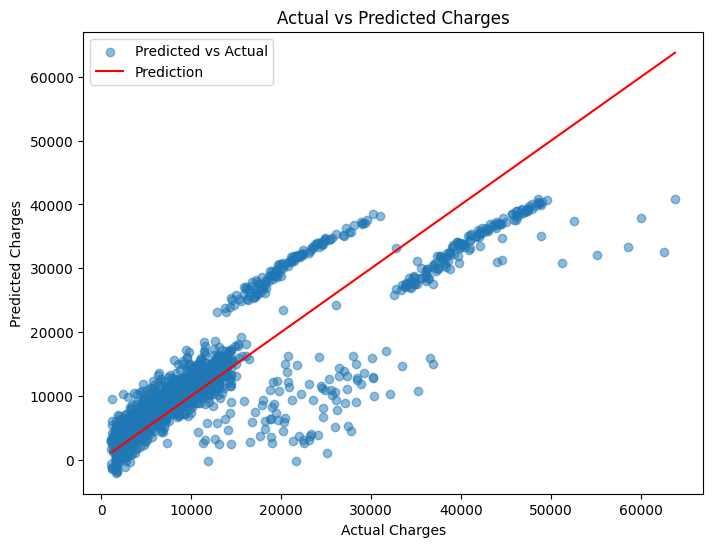

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Prediction')

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

print("Coefficient (w):", model.coef_[0])
print("Intercept (b):", model.intercept_)


Mean Squared Error: 36501893.00741544
Coefficient (w): 256.8563525373487
Intercept (b): -11938.538576167139


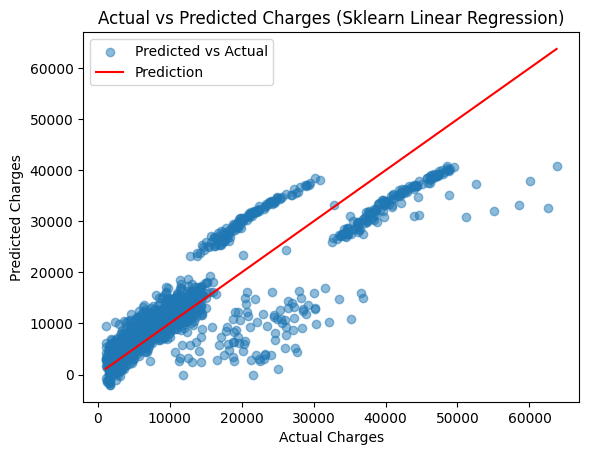

In [41]:
plt.scatter(y, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Prediction')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Sklearn Linear Regression)')
plt.legend()
plt.show()